In [28]:
# import the necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
Fraud_D = pd.read_csv("onlinefraud.csv")


In [30]:
print(Fraud_D.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [31]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
Fraud_D.drop('isFlaggedFraud', axis=1, inplace=True)

In [33]:
Fraud_D.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [34]:
Fraud_D.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]

In [35]:
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [36]:
Fraud_D.tail()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [37]:
Fraud_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   step                                 int64  
 1   type                                 object 
 2   amount                               float64
 3   customer_starting_transaction        object 
 4   bal_before_transaction               float64
 5   bal_after_transaction                float64
 6   recipient_of_transaction             object 
 7   bal_of_recepient_before_transaction  float64
 8   bal_of_receipient_after_transaction  float64
 9   fraud_transaction                    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [38]:
Fraud_D.describe()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [39]:
Fraud_D.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0
std,142,603858,2888242,2924048,3399180,3674128,0
min,1,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0
75%,335,208721,107315,144258,943036,1111909,0
max,743,92445516,59585040,49585040,356015889,356179278,1


In [40]:
Fraud_D.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False


In [41]:
Fraud_D.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
dtype: int64

<Axes: title={'center': 'missing data visualization in the dataset'}>

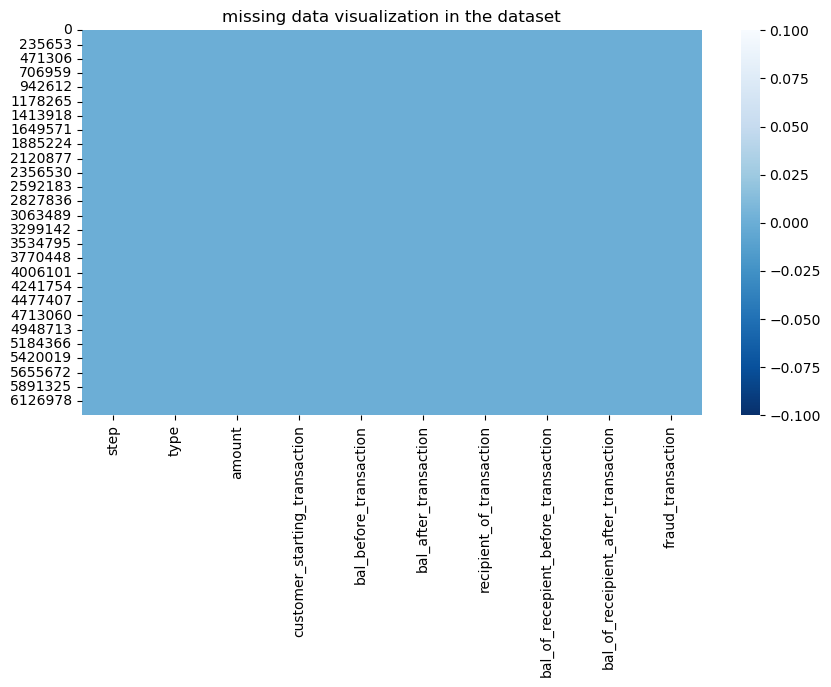

In [42]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(Fraud_D.isnull(), cbar =True, cmap= "Blues_r")

In [43]:
#check shape of the entire dataframe using .shape attribute
Fraud_D.shape

(6362620, 10)

Text(0, 0.5, 'count of online transaction type ')

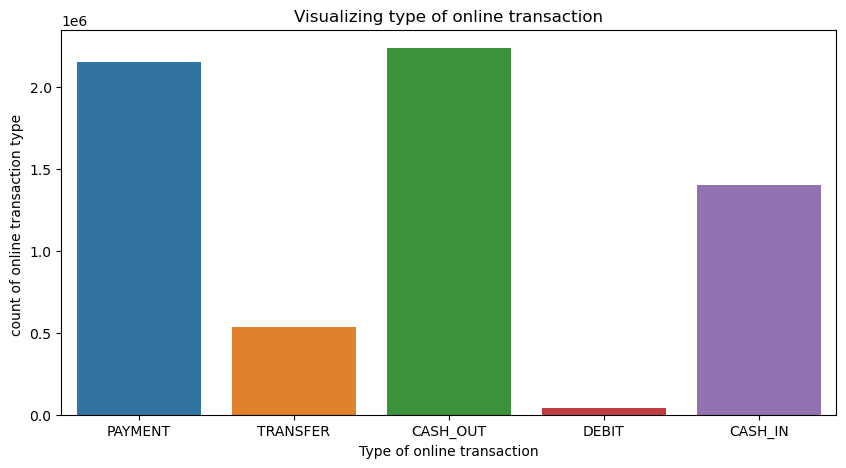

In [44]:
# Univariate Analysis
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

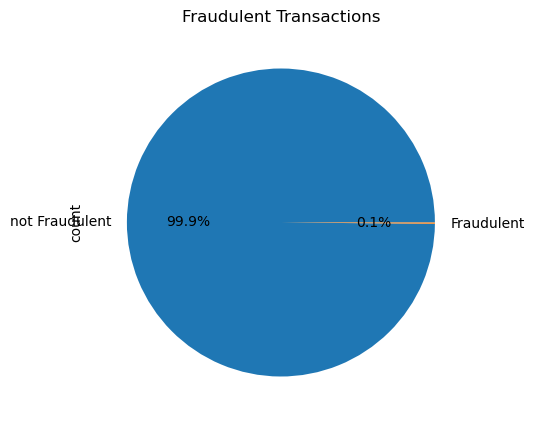

In [45]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["fraud_transaction"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

In [46]:
Fraud_D.fraud_transaction_label.value_counts()

fraud_transaction_label
not Fraudulent    6354407
Fraudulent           8213
Name: count, dtype: int64

In [47]:
8213/6354407*100

0.129248881917699

<Axes: xlabel='step', ylabel='Density'>

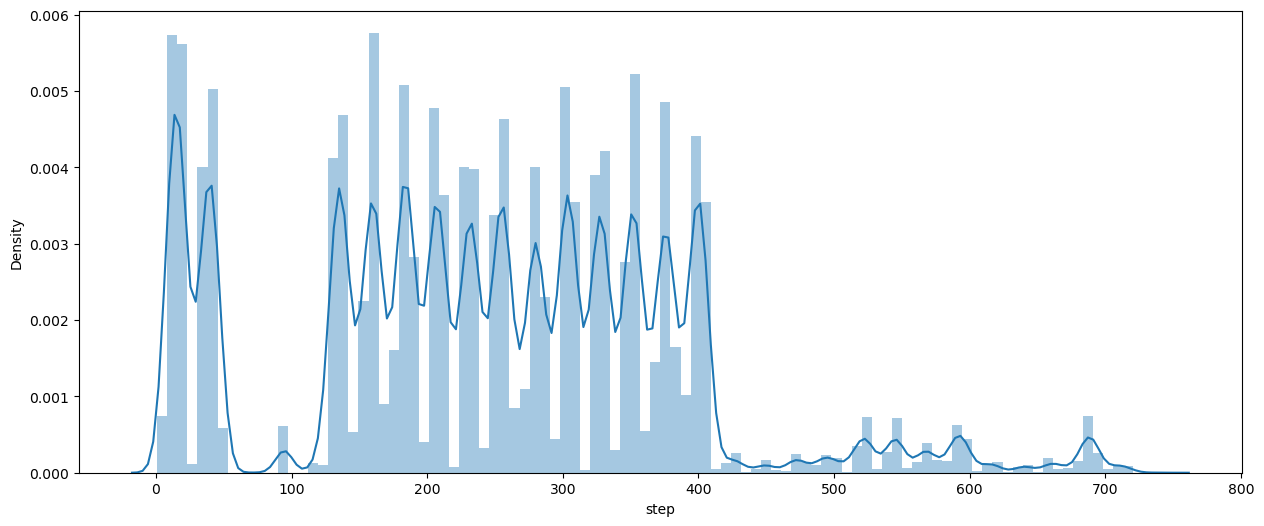

In [48]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(Fraud_D['step'],bins=100)

<Axes: xlabel='amount', ylabel='Count'>

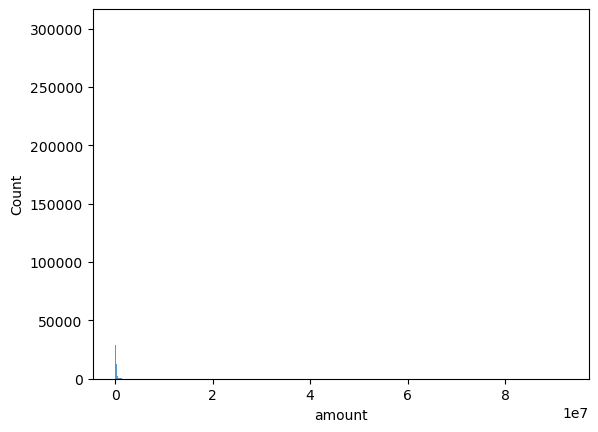

In [50]:
# Visualization for amount column

sns.histplot(x= "amount", data =Fraud_D)

In [51]:
Fraud_D.head()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent


<Axes: xlabel='type', ylabel='amount'>

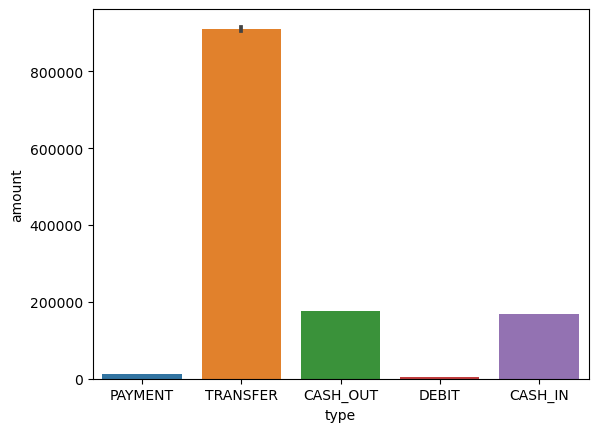

In [52]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=Fraud_D)


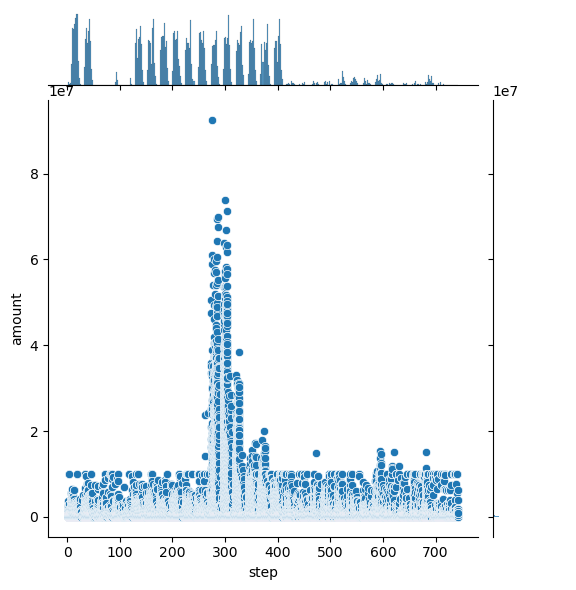

In [53]:
# Visualization between step and amount

sns.jointplot(x='step',y='amount',data=Fraud_D)


<Axes: xlabel='amount', ylabel='step'>

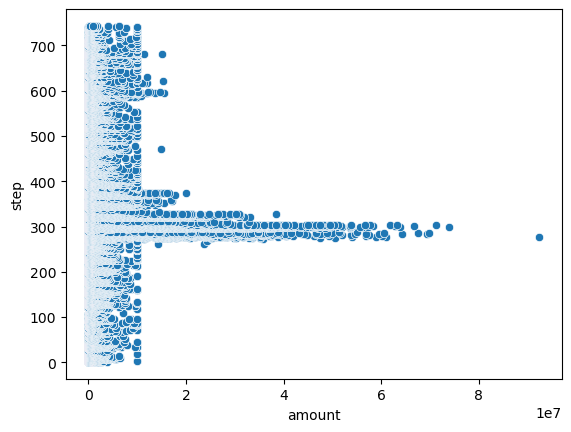

In [54]:
sns.scatterplot(x=Fraud_D["amount"], y=Fraud_D["step"])

Text(0, 0.5, 'fraud_transaction_label')

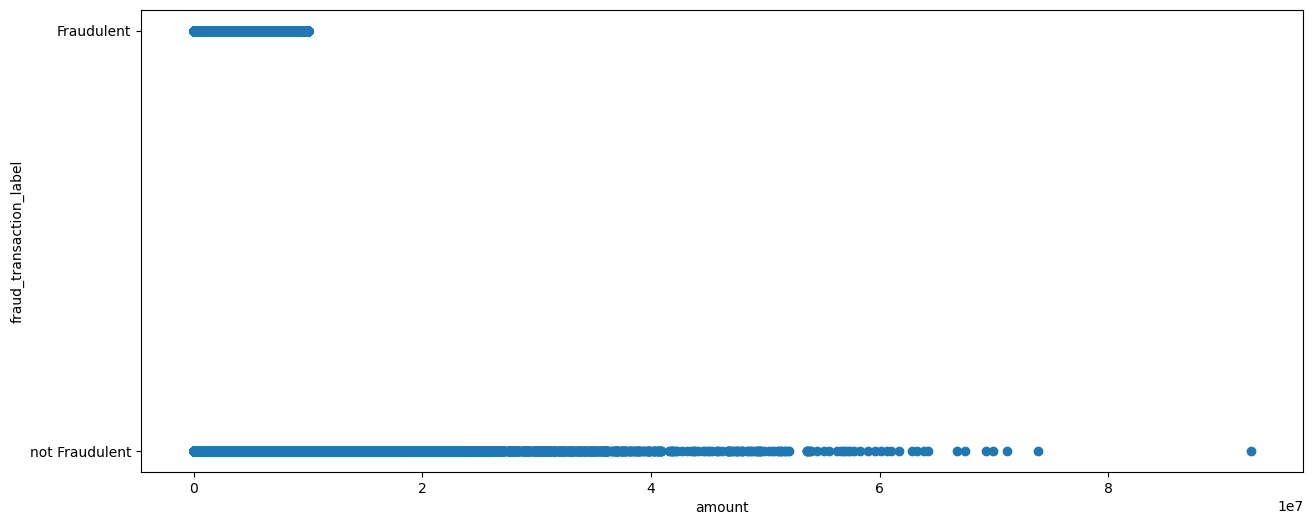

In [55]:
# Visualization between amount and fraud_transaction_label

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Text(0, 0.5, 'fraud_transaction_label')

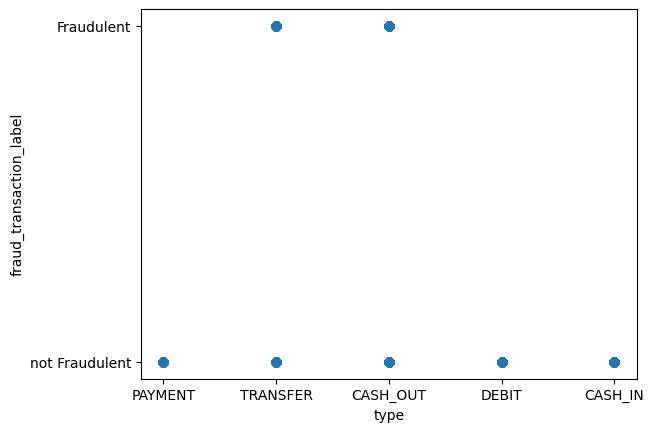

In [56]:
# Visualization between type and isfraud_label

plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

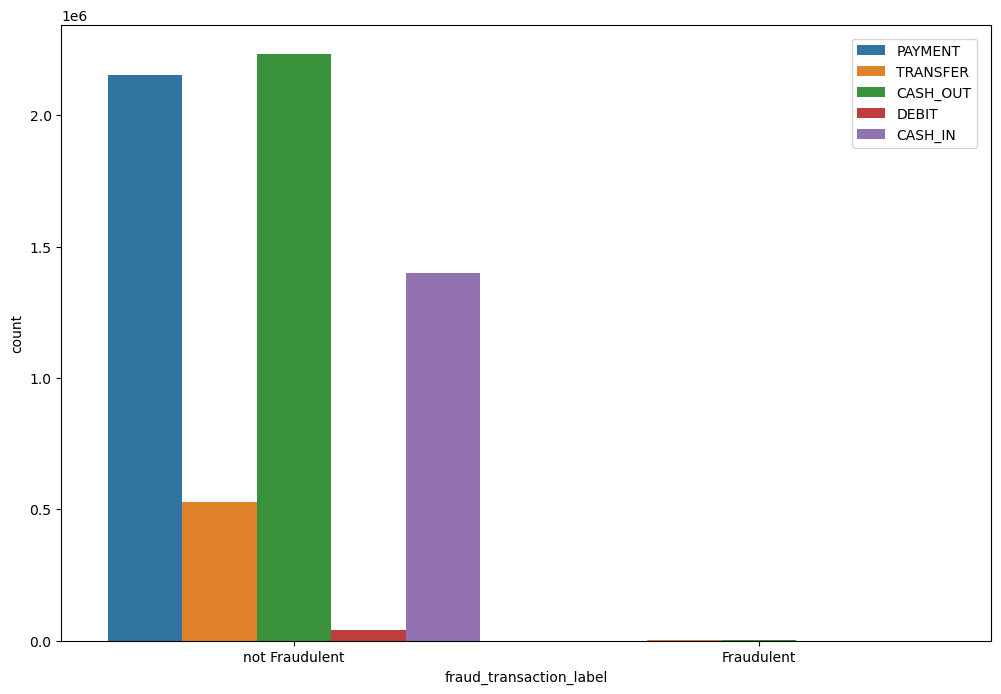

In [57]:
# Visualization between type and isfraud_label

plt.figure(figsize=(12,8))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

<Axes: xlabel='type', ylabel='step'>

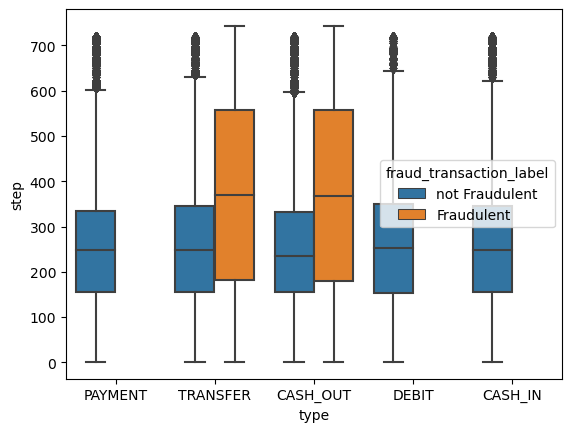

In [58]:
# Visualizing btw step,type and isFraud_label

sns.boxplot(x= "type", y= "step", hue ="fraud_transaction_label", data= Fraud_D)

In [59]:
# One Hot Encoding
#1. select categorical variables

categorical = ['type']
#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [60]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

#check what you have done
print(Fraud_D.shape)
Fraud_D.head()

(6362620, 16)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent,False,False,False,True,False


In [61]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once

Fraud_D.drop(categorical, axis = 1, inplace = True)

Fraud_D.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)
Fraud_D.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


In [62]:
#Select Target
y = Fraud_D.fraud_transaction
#Selecting Features
X = Fraud_D.drop(['fraud_transaction'], axis = 1)

In [63]:
X

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,False,False,False,False,True



For LogisticRegression, Accuracy score is 0.9988448155005328 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270809
           1       0.58      0.51      0.54      1715

    accuracy                           1.00   1272524
   macro avg       0.79      0.75      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



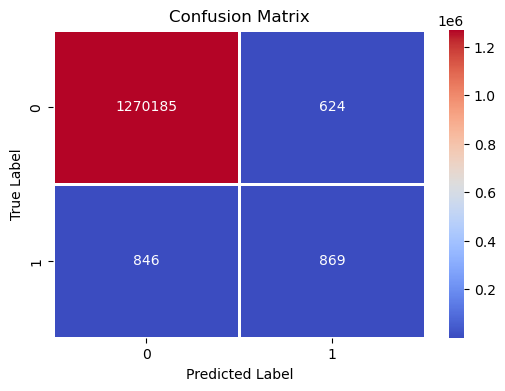


For KNeighborsClassifier, Accuracy score is 0.999437338706382 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270809
           1       0.88      0.68      0.76      1715

    accuracy                           1.00   1272524
   macro avg       0.94      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



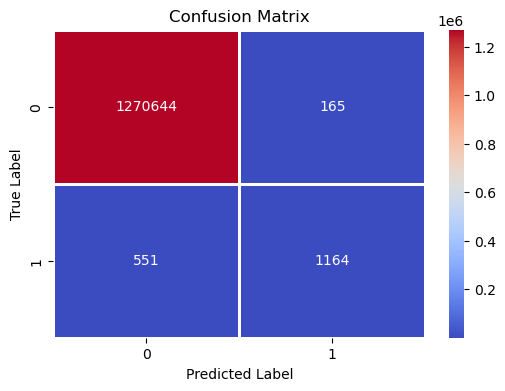


For DecisionTreeClassifier, Accuracy score is 0.9996958799991199 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270809
           1       0.91      0.86      0.88      1715

    accuracy                           1.00   1272524
   macro avg       0.95      0.93      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



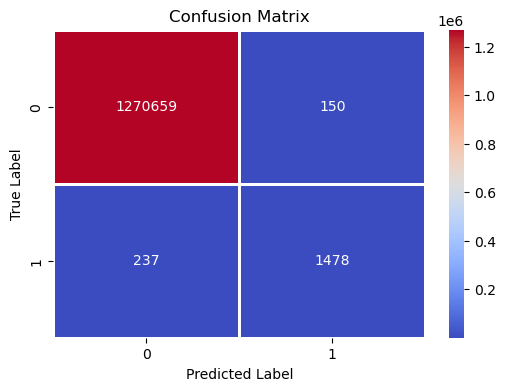


For RandomForestClassifier, Accuracy score is 0.9996950941593243 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270809
           1       0.99      0.78      0.87      1715

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



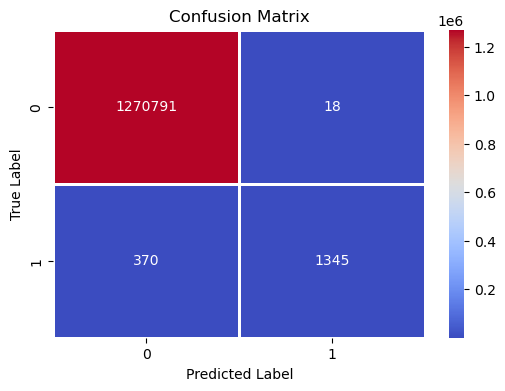

In [65]:
#Import ML algorithms and initialize them
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
## Train test split( training on 80% while testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Initialize each models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
#create list of your model names
models = [LR,KN,DC,RF]
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
from sklearn.metrics import confusion_matrix
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)